# Image classifier

<big> I use TensorFlow and learn neural network on Fashion MNIST Dataset. This dataset contains images of 10 types of clothes. NN will classify images into a distinct class. 

First of all, import helper libraries and download data

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("Train dataset: ",train_images.shape)
print("Train dataset: ",test_images.shape)

Train dataset:  (60000, 28, 28)
Train dataset:  (10000, 28, 28)


<big>In the dataset, each image is mapped into a single label. Let's see sample of one image

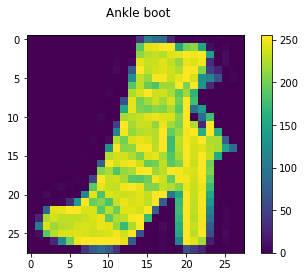

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
               'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[11])
plt.colorbar()
plt.suptitle(class_names[train_labels[11]])
plt.grid(False)
plt.show()

<big>For preprocessing - scale values of dataset to a range of 0 to 1</big>

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

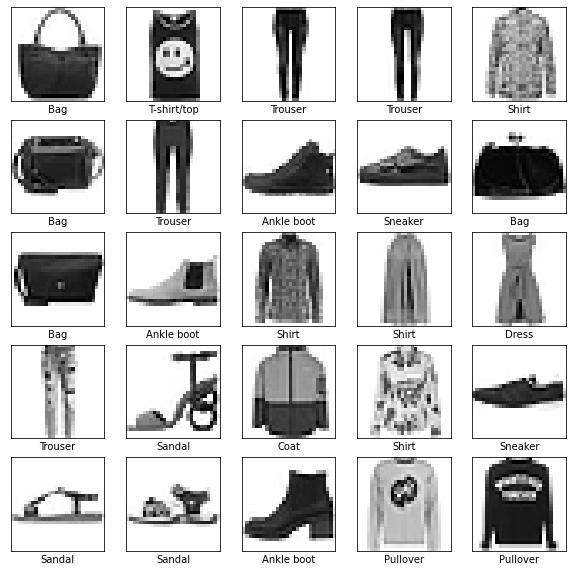

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+100], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i+100]])
plt.show()

## Building model

<big>First of all, setting up layers and compile our model</big>

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<big>Now, let’s train the Neural Network for the task of Image Classification with TensorFlow, and make predictions on it and evaluate accuracy
    </big>

In [6]:
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

#train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
#print('\ntrain accuracy:', train_acc)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5049 - accuracy: 0.8174
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3706 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3340 - accuracy: 0.8744
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3116 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2924 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2769 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2670 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2582 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2450 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

<big> After training, let's save predictions and visualise some of them on the plot

In [7]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [8]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

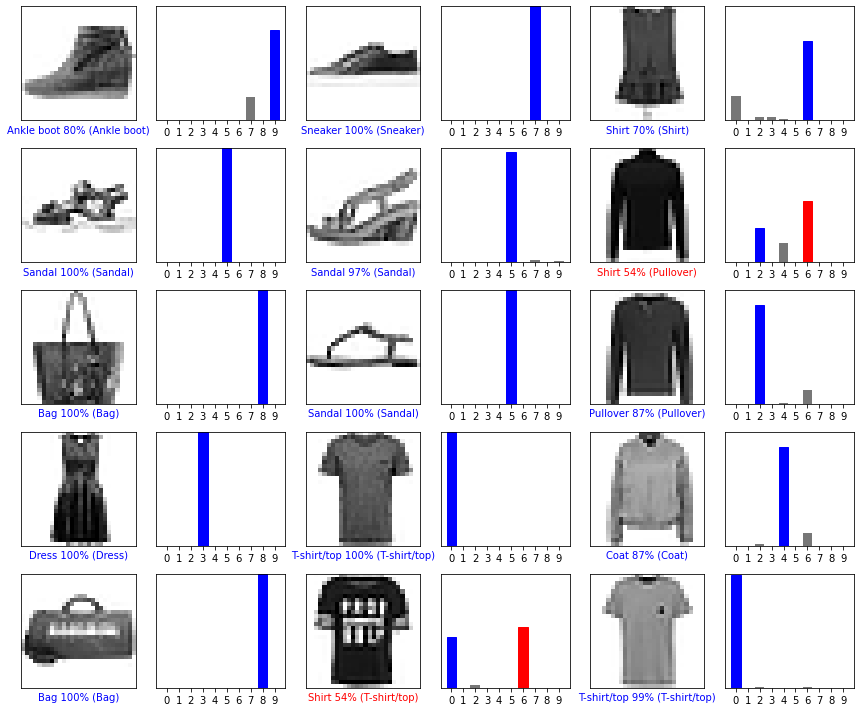

In [9]:
# Plot test images, their predicted labels, and the true labels
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+250, predictions[i+250], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+250, predictions[i+250], test_labels)
plt.tight_layout()
plt.show()

## Extra 

<big> Now let's do interactive task. Here I add my picture, compress it, and run probability model on it. 

In [21]:
dd = Image.open('s.jpg')
dd = dd.convert(mode = 'L')
dd.thumbnail((28,28))
print(dd.size)
print(dd.mode)
dd.save('s_g.jpg')

(28, 28)
L


(28, 28)


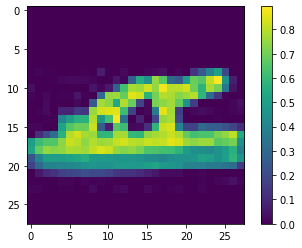

In [22]:
pic = image.imread('s_g.jpg')
#pic = test_images[100]
print(pic.shape)
pic = (255 - pic)/255.0
#pic = (pic)/255.0
#pic[pic<0.1] = 0 
p = pic.reshape(1,28,28)
plt.figure()
plt.imshow(pic)
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
our_predictions = probability_model.predict(p)

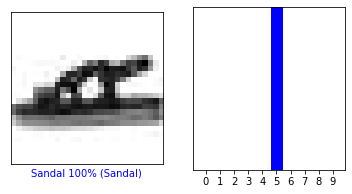

In [24]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(0, our_predictions[0], [5], p)
plt.subplot(1,2,2)
plot_value_array(0, our_predictions[0],  [5])
plt.show()